<a href="https://colab.research.google.com/github/abrahao-dev/BitcoinMarketTrends/blob/main/bitcoin_pattern_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

In [2]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "30"}  # Coletando dados dos últimos 30 dias
response = requests.get(url, params=params)
data = response.json()

# Convertendo os dados para um DataFrame
prices = data['prices']
volumes = data['total_volumes']

# Criando DataFrame
df = pd.DataFrame({
    'timestamp': [x[0] for x in prices],
    'price': [x[1] for x in prices],
    'volume': [x[1] for x in volumes]
})

# Convertendo timestamps para datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

# Exibindo as primeiras linhas
print(df.head())


                                price        volume
timestamp                                          
2025-02-22 20:04:50.643  96631.345709  2.604542e+10
2025-02-22 21:04:44.980  96576.691864  2.232019e+10
2025-02-22 22:01:33.157  96676.442368  1.759988e+10
2025-02-22 23:05:45.135  96635.747665  1.886333e+10
2025-02-23 00:04:47.721  96526.324519  1.857307e+10


In [3]:
# Verificando dados ausentes
print(df.isnull().sum())

# Se houver dados faltantes, você pode preencher ou remover
df = df.dropna()  # Removendo linhas com dados faltantes

price     0
volume    0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['price', 'volume']] = scaler.fit_transform(df[['price', 'volume']])

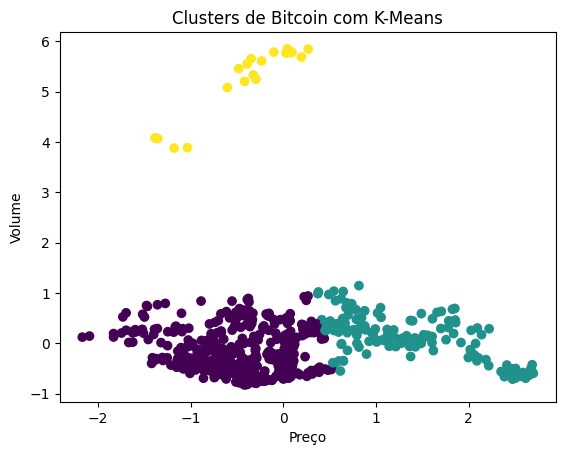

In [5]:
from sklearn.cluster import KMeans

# Selecionando as características (preço e volume)
X = df[['price', 'volume']]

# Aplicando K-Means
kmeans = KMeans(n_clusters=3)  # Definindo 3 clusters
df['cluster'] = kmeans.fit_predict(X)

# Visualizando os clusters
import matplotlib.pyplot as plt

plt.scatter(df['price'], df['volume'], c=df['cluster'])
plt.xlabel('Preço')
plt.ylabel('Volume')
plt.title('Clusters de Bitcoin com K-Means')
plt.show()


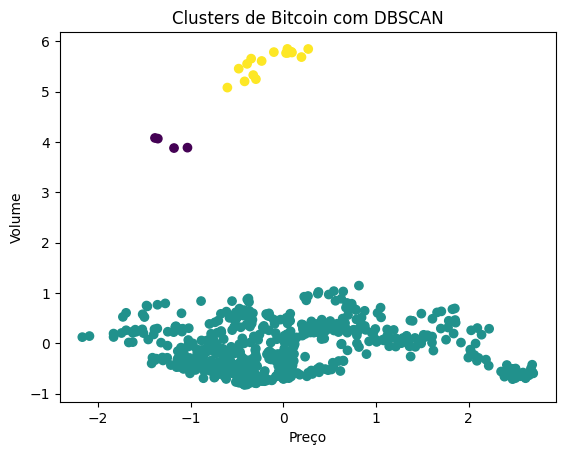

In [7]:
from sklearn.cluster import DBSCAN

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(X)

# Visualizando os clusters
plt.scatter(df['price'], df['volume'], c=df['cluster'])
plt.xlabel('Preço')
plt.ylabel('Volume')
plt.title('Clusters de Bitcoin com DBSCAN')
plt.show()
